# General requirements for the assignment

- Make appropriate comments to your code
- Use Markdown cells to provide your answers (when applicable)
- Add your code when there is the comment "YOUR CODE HERE".
- Stick to Pep8 standard as much as possible for your coding
- Tag the commit as *Final submission of Assignment 2*
- Submit through GitHub
- Provide your GitHub url to the Ipython notebook as the submisison for Brightspace assignment 2
- Post (interesting) errors in the course Github's issue page

# Assignment Intro

In this assignment, you will be asked to implement some functionalities on the dataset that you worked with in the first assignment.

### DEADLINE FOR THIS ASSIGNMENT IS 01 OCTOBER 2021 BEFORE 23:59

<hr />

## Import libraries
Update this list as you go along the assigment

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
import numpy as np
from scipy.signal import find_peaks
from scipy.signal import argrelmin

## Preparing data

### 1. Read 2020 and 2021 data for your selected country. You only need provincial data for this assignment. Print the first 5 lines of data

In [3]:
data_dir = r'C:\Users\Govert\Downloads\Region_Mobility_Report_CSVs'
country_code = 'DK'

file_path_2020 = r'C:\Users\Govert\Downloads\Region_Mobility_Report_CSVs\2020_DK_Region_Mobility_Report.csv'
df_2020 = pd.read_csv(file_path_2020)
df_2020.insert(0,'year', '2020')

file_path_2021 = r'C:\Users\Govert\Downloads\Region_Mobility_Report_CSVs\2021_DK_Region_Mobility_Report.csv'
df_2021 = pd.read_csv(file_path_2021)
df_2021.insert(0,'year', '2021')
 
df = pd.concat((df_2020, df_2021))
df_province = df[(df['sub_region_1'].notna()) & (df['sub_region_2'].isna())]

df_province = df_province.drop(columns = ['country_region_code', 'country_region'])
df_province.head(5)

,year,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
321,2020,Capital Region of Denmark,NaN,NaN,DK-84,NaN,ChIJb8pj4aWGU0YRUFSorMmvAAM,2020-02-15,-3.0,-3.0,-4.0,0.0,-5.0,0.0
322,2020,Capital Region of Denmark,NaN,NaN,DK-84,NaN,ChIJb8pj4aWGU0YRUFSorMmvAAM,2020-02-16,-7.0,-7.0,-30.0,-4.0,-4.0,1.0
323,2020,Capital Region of Denmark,NaN,NaN,DK-84,NaN,ChIJb8pj4aWGU0YRUFSorMmvAAM,2020-02-17,-1.0,-1.0,-1.0,0.0,0.0,1.0
324,2020,Capital Region of Denmark,NaN,NaN,DK-84,NaN,ChIJb8pj4aWGU0YRUFSorMmvAAM,2020-02-18,2.0,2.0,15.0,0.0,1.0,0.0
325,2020,Capital Region of Denmark,NaN,NaN,DK-84,NaN,ChIJb8pj4aWGU0YRUFSorMmvAAM,2020-02-19,2.0,-2.0,5.0,-2.0,0.0,1.0


### 2. For this assignment, select and extract the data for a single province. Name the dataframe for this subset `df_province_selected`

In [4]:
df_province_selected = (df_province.loc[df_province['sub_region_1'] == 'Capital Region of Denmark'])
df_province_selected.head(5)

,year,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
321,2020,Capital Region of Denmark,NaN,NaN,DK-84,NaN,ChIJb8pj4aWGU0YRUFSorMmvAAM,2020-02-15,-3.0,-3.0,-4.0,0.0,-5.0,0.0
322,2020,Capital Region of Denmark,NaN,NaN,DK-84,NaN,ChIJb8pj4aWGU0YRUFSorMmvAAM,2020-02-16,-7.0,-7.0,-30.0,-4.0,-4.0,1.0
323,2020,Capital Region of Denmark,NaN,NaN,DK-84,NaN,ChIJb8pj4aWGU0YRUFSorMmvAAM,2020-02-17,-1.0,-1.0,-1.0,0.0,0.0,1.0
324,2020,Capital Region of Denmark,NaN,NaN,DK-84,NaN,ChIJb8pj4aWGU0YRUFSorMmvAAM,2020-02-18,2.0,2.0,15.0,0.0,1.0,0.0
325,2020,Capital Region of Denmark,NaN,NaN,DK-84,NaN,ChIJb8pj4aWGU0YRUFSorMmvAAM,2020-02-19,2.0,-2.0,5.0,-2.0,0.0,1.0


The following show an example from extracting the data for South Holland, the Netherlands

In [5]:
df_province_selected.head()

,year,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
321,2020,Capital Region of Denmark,NaN,NaN,DK-84,NaN,ChIJb8pj4aWGU0YRUFSorMmvAAM,2020-02-15,-3.0,-3.0,-4.0,0.0,-5.0,0.0
322,2020,Capital Region of Denmark,NaN,NaN,DK-84,NaN,ChIJb8pj4aWGU0YRUFSorMmvAAM,2020-02-16,-7.0,-7.0,-30.0,-4.0,-4.0,1.0
323,2020,Capital Region of Denmark,NaN,NaN,DK-84,NaN,ChIJb8pj4aWGU0YRUFSorMmvAAM,2020-02-17,-1.0,-1.0,-1.0,0.0,0.0,1.0
324,2020,Capital Region of Denmark,NaN,NaN,DK-84,NaN,ChIJb8pj4aWGU0YRUFSorMmvAAM,2020-02-18,2.0,2.0,15.0,0.0,1.0,0.0
325,2020,Capital Region of Denmark,NaN,NaN,DK-84,NaN,ChIJb8pj4aWGU0YRUFSorMmvAAM,2020-02-19,2.0,-2.0,5.0,-2.0,0.0,1.0


### 3. Aggregated measurements

#### Write a function with the following arguments as the input:
- a dataset as a dataframe object
- list of attributes (refers to df.columns)
- a year
- one of the following statistic measurements: mean/median/max/min. You can use [enum](https://docs.python.org/3/library/enum.html) for this argument.
  
The function will then return the required statistic on some attributes of the data for a particular year.

In [6]:
def calculate_statistic(data, attributes, year, statistic='mean'):

    data = data.loc[data['year'] == year]
    results = []
    
    for item in attributes:
        if statistic == 'mean':
            result = data[item].mean(axis=0)
        elif statistic == 'median':
            result = data[item].median(axis=0)
        elif statistic == 'max':
            result = data[item].max(axis=0)
        elif statistic == 'min':
            result = data[item].min(axis=0)
        results.append(result)
    
    return results

#### Call your calculate_statistic function and print the results with three different input arguments

In [7]:
df_province_selected.describe()
r = calculate_statistic(
    df_province_selected,
    ['grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline'],
    '2021',
    'median'
    )
print(r)


[-8.0, 81.0, -37.0]


## Activity changes

Since there are quite some noises when looking at daily data, it is easier to observe data on a larger aggregation level. The following code derives 7-day averages for the provice data. We also prepare a plot to visualise it for you.

In [8]:
df_province_agg = df_province_selected.resample('7D', on='date').mean()
df_province_agg.reset_index(inplace=True)
df_province_agg.head()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

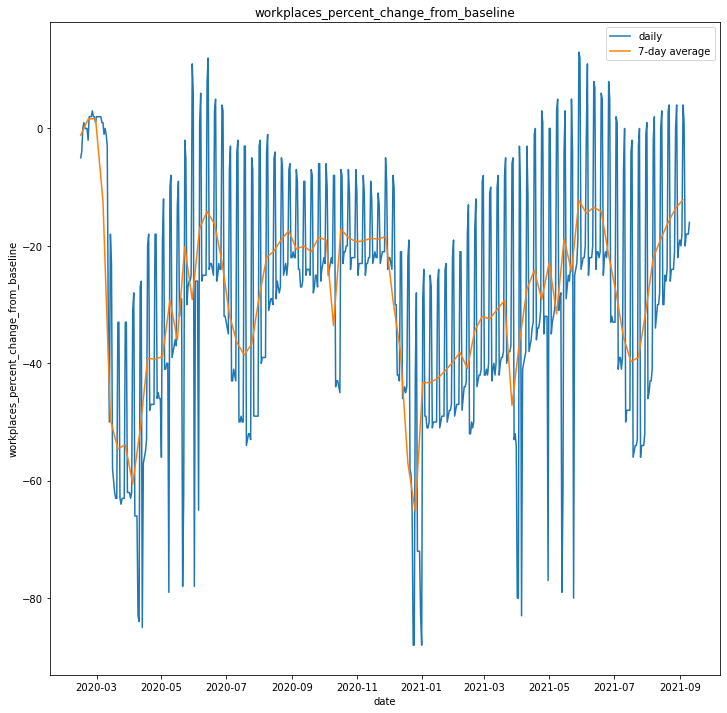

In [ ]:
fig, ax=plt.subplots(figsize=(12,12))
ax.set_title('workplaces_percent_change_from_baseline')
sns.lineplot(x='date', y='workplaces_percent_change_from_baseline', data=df_province_selected, label='daily', ax=ax)
sns.lineplot(x='date', y='workplaces_percent_change_from_baseline', data=df_province_agg, label='7-day average', ax=ax)
plt.show()

## Identifying peaks

Let's focus on the 7-day averaged data. This averaged time series data shows how many times workplace changes reach peaks. Your task is to identify these moments. 

### 4. Identify peaks with personal code

Complete the function below. Your function should return (at least) a list of indexes where there are peaks in data.

In [1]:
def my_find_peaks(data, activity, **kwargs):

    diff_1 = data[activity].diff(periods = -1)
    diff_2 = data[activity].diff(periods = 1)
    
    peaks = []
    for i in range(len(diff_1)):
        if diff_1[i] > 0 and diff_2[i] > 0:
            peaks.append(int(i))          
            
    return peaks

In [9]:
activity = 'workplaces_percent_change_from_baseline'
max_ind = my_find_peaks(
    df_province_agg, 
    activity
)

print(max_ind)

NameError: name 'df_province_agg' is not defined

In [ ]:
df_max = df_province_agg.loc[max_ind]
df_max.head()

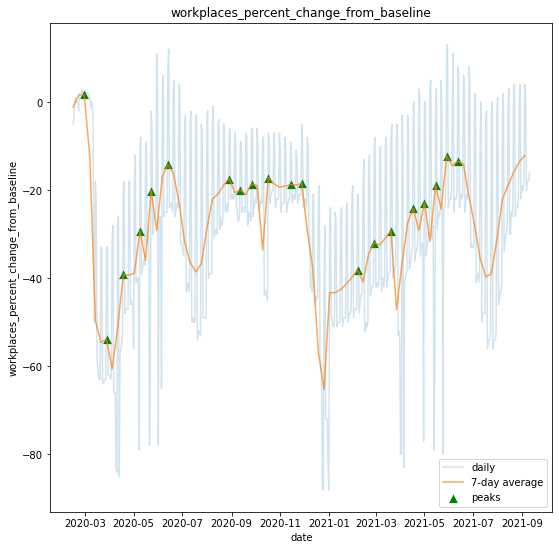

In [ ]:
#Code to visualise the raw data, sampled data and the peaks
# create a figure and an axis to plot
fig, ax = plt.subplots(figsize=(9,9))
# set the title of the plot
ax.set_title(activity)
# plot the daily values
sns.lineplot(x='date', y=activity, data=df_province_selected, label='daily', ax=ax, alpha=0.2)
# plot the 7-day average
sns.lineplot(data=df_province_agg, x='date', y=activity, label='7-day average', ax=ax, alpha=0.7)
# label the peaks
sns.scatterplot(x='date', y=activity, data=df_max, label='peaks', ax=ax, marker='^', color='g', s=100)
plt.show()

### 5. Identify peaks using library scipy - [find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html)

In [ ]:
scipy.signal.find_peaks(df_province_agg[activity])

(array([ 2,  6,  9, 12, 14, 17, 28, 30, 32, 35, 39, 41, 51, 54, 57, 61, 63,
        65, 67, 69], dtype=int64),
 {})

### 6. Identify valleys

You have identified the peaks in the data above using both your personal approach and the scipy library. Here, you can also identify the valleys (or troughs) using either of these approaches.

In [ ]:
def my_find_valleys(data, activity, **kwargs):

    diff_1 = data[activity].diff(periods = -1)
    diff_2 = data[activity].diff(periods = 1)
    
    valleys = []
    for i in range(len(diff_1)):
        if diff_1[i] < 0 and diff_2[i] < 0:
            valleys.append(int(i))          
            
    return valleys

In [ ]:
activity = 'workplaces_percent_change_from_baseline'
min_ind = my_find_valleys(
    df_province_agg, 
    activity
)

print(min_ind)

[5, 7, 10, 13, 15, 22, 29, 31, 34, 37, 40, 45, 52, 55, 58, 62, 64, 66, 68, 74]


In [ ]:
df_min = df_province_agg.loc[min_ind]

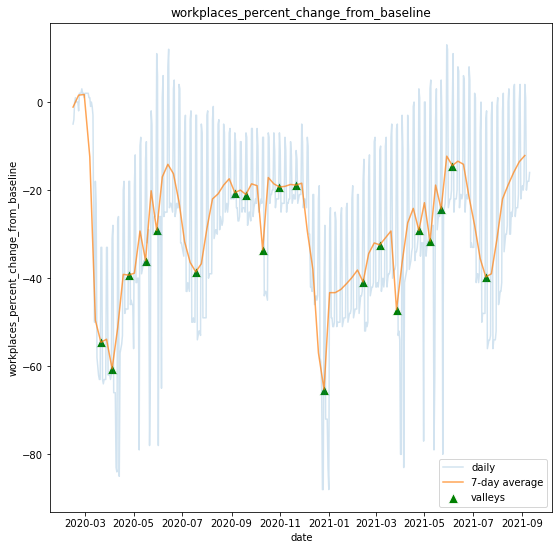

In [ ]:
#Code to visualise the raw data, sampled data and the valleys
# create a figure and an axis to plot
fig, ax = plt.subplots(figsize=(9,9))
# set the title of the plot
ax.set_title(activity)
# plot the daily values
sns.lineplot(x='date', y=activity, data=df_province_selected, label='daily', ax=ax, alpha=0.2)
# plot the 7-day average
sns.lineplot(x='date', y=activity, data=df_province_agg, label='7-day average', ax=ax, alpha=0.7)
# label the valleys
sns.scatterplot(x='date', y=activity, data=df_min, label='valleys', ax=ax, marker='^', color='g', s=100)
plt.show()

### 7. Identify all the peaks (and potentially valleys) for all the activities in the data. Print out the peaks for each of the activities. 

If you are brave, you can make use of the plotting piece of code that is provided above to plot the results.

In [ ]:
activities = ['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']

for item in activities:
    
    print(item)
    
    def my_find_peaks(data, activity, **kwargs):

        diff_1 = data[activity].diff(periods = -1)
        diff_2 = data[activity].diff(periods = 1)

        peaks = []
        for i in range(len(diff_1)):
            if diff_1[i] > 0 and diff_2[i] > 0:
                peaks.append(int(i))          
                
        return peaks
    
    max_ind = my_find_peaks(
        df_province_agg, 
        item
    )

    print(max_ind)
    
#     df_max = df_province_agg.loc[max_ind]
    
#     fig, ax = plt.subplots(figsize=(9,9))
#     ax.set_title(item)
#     sns.lineplot(x='date', y=item, data=df_province_selected, label='daily', ax=ax, alpha=0.2)
#     sns.lineplot(x='date', y=item, data=df_province_agg, label='7-day average', ax=ax, alpha=0.7)
#     sns.scatterplot(x='date', y=item, data=df_max, label='peaks', ax=ax, marker='^', color='g', s=100)
#     plt.show()
    
    def my_find_valleys(data, activity, **kwargs):
        diff_1 = data[activity].diff(periods = -1)
        diff_2 = data[activity].diff(periods = 1)

        valleys = []
        for i in range(len(diff_1)):
            if diff_1[i] < 0 and diff_2[i] < 0:
                valleys.append(int(i))
                
        return valleys
    
    min_ind = my_find_valleys(
        df_province_agg, 
        item
    )

    print(min_ind)
    
#     df_min = df_province_agg.loc[min_ind]
    
#     fig, ax = plt.subplots(figsize=(9,9))
#     ax.set_title(item)
#     sns.lineplot(x='date', y=item, data=df_province_selected, label='daily', ax=ax, alpha=0.2)
#     sns.lineplot(x='date', y=item, data=df_province_agg, label='7-day average', ax=ax, alpha=0.7)
#     sns.scatterplot(x='date', y=item, data=df_min, label='valleys', ax=ax, marker='^', color='g', s=100)
#     plt.show()


retail_and_recreation_percent_change_from_baseline
[2, 7, 9, 14, 19, 24, 28, 34, 41, 50, 54, 57, 65, 67, 71, 74, 76, 80]
[5, 8, 11, 15, 20, 26, 31, 45, 51, 55, 59, 66, 70, 73, 75, 78]
grocery_and_pharmacy_percent_change_from_baseline
[1, 3, 9, 12, 14, 17, 25, 28, 33, 36, 38, 41, 47, 54, 57, 61, 63, 65, 67, 70, 77]
[2, 5, 10, 13, 15, 22, 27, 31, 34, 37, 39, 45, 48, 55, 58, 62, 64, 66, 69, 75, 78]
parks_percent_change_from_baseline
[2, 5, 7, 9, 11, 15, 18, 22, 25, 30, 34, 44, 47, 50, 53, 58, 61, 64, 68, 73]
[3, 6, 8, 10, 12, 16, 20, 23, 28, 33, 42, 45, 48, 52, 55, 59, 63, 66, 71, 78]
transit_stations_percent_change_from_baseline
[1, 9, 12, 19, 21, 25, 28, 35, 39, 41, 47, 54, 57, 61, 65, 72]
[5, 10, 13, 20, 22, 27, 34, 38, 40, 45, 48, 55, 58, 62, 66, 75]
workplaces_percent_change_from_baseline
[2, 6, 9, 12, 14, 17, 28, 30, 32, 35, 39, 41, 51, 54, 57, 61, 63, 65, 67, 69]
[5, 7, 10, 13, 15, 22, 29, 31, 34, 37, 40, 45, 52, 55, 58, 62, 64, 66, 68, 74]
residential_percent_change_from_baseline


### 8. Is there any common dates (or periods) among these peaks (and/or valleys) of different activities

*Food for thoughts*:
- One of the most naive way to find the overlapping dates is to look for common indexes (or dates) of the peaks/valleys
- A more general solution is to have a tolerance level between the days. For example, Sep 19 and Sep 20 can be considered matched (or overlapped) if the tolerance level is at least one day.

In [ ]:
# I haven't found a way to find weeks that have more peaks or valleys or both. 
# I was thinking about making a dataframe with only zeros and ones, 
#   where the ones would replace the peaks and valleys and the zeros all other values. 
# Then summing over the rows would give the dates that have more than just one peak and/or valley. 


## OPTIONAL

Append population/density for provinces/municipalities to the dataframe. The data for Netherlands is available [here](https://www.cbs.nl/en-gb/news/2021/30/population-growth-picks-up-again)


In [ ]:
# YOUR CODE HERE
